### Packages

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from numpy import array 
##Removes warning for chained assignments
pd.options.mode.chained_assignment = None  # default='warn'

In [30]:
df = pd.read_csv('../raw_data/ratios.csv')
df

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
0,2020-08-31,0.311845,0.310544,2.548054,0.203834,0.727693,2.136432,0.882281
1,2020-09-01,0.332974,0.306303,2.687319,0.203522,0.722940,2.094566,0.855546
2,2020-09-02,0.332368,0.315056,2.629334,0.204743,0.734758,2.125291,0.872526
3,2020-09-03,0.339772,0.310060,2.534974,0.201707,0.728923,2.210971,0.848504
4,2020-09-04,0.356920,0.300754,2.536138,0.199887,0.707646,2.152835,0.854765
...,...,...,...,...,...,...,...,...
492,2022-08-15,0.813028,0.321488,4.111073,0.197467,1.123670,3.277218,0.920803
493,2022-08-16,0.814154,0.323634,4.118669,0.200499,1.158238,3.283272,0.933379
494,2022-08-17,0.815450,0.327442,4.154118,0.201342,1.191888,3.347435,0.935173
495,2022-08-18,0.816374,0.333768,4.222490,0.204492,1.196920,3.371537,0.950678


In [31]:
A = df[['Date','DE_BXP']]
A.set_index('Date',inplace=True)
A.rename(columns = {'DE_BXP': 'Ratio'},inplace=True)
A.head()

,Ratio
Date,
2020-08-31,2.548054
2020-09-01,2.687319
2020-09-02,2.629334
2020-09-03,2.534974
2020-09-04,2.536138


### Create time lags t-1 , t-40

In [32]:
for i in range(1,41):
    A[f't-{i}'] = A['Ratio'].shift(i)
A.dropna(inplace = True)


In [33]:
A

,Ratio,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,3.129796,...,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334,2.687319,2.548054
2020-10-28,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,...,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334,2.687319
2020-10-29,3.325579,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,...,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334
2020-10-30,3.259769,3.325579,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,...,2.637538,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974
2020-11-02,3.183293,3.259769,3.325579,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,...,2.755974,2.637538,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15,4.111073,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,...,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691,3.598200,3.611955
2022-08-16,4.118669,4.111073,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,...,3.329250,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691,3.598200
2022-08-17,4.154118,4.118669,4.111073,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,...,3.204585,3.329250,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691


### Create training split

#### create a split for previous 5 days and previous six to 35 days

In [17]:
X_train = A.loc[:, 't-5':'t-40']
X_train = X_train.iloc[0:451]
X_train

,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,3.277922,3.274337,3.229360,3.131104,3.129796,3.107535,2.988218,2.963747,2.907727,2.924360,...,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334,2.687319,2.548054
2020-10-28,3.247866,3.277922,3.274337,3.229360,3.131104,3.129796,3.107535,2.988218,2.963747,2.907727,...,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334,2.687319
2020-10-29,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,3.129796,3.107535,2.988218,2.963747,...,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334
2020-10-30,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,3.129796,3.107535,2.988218,...,2.637538,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974
2020-11-02,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,3.129796,3.107535,...,2.755974,2.637538,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,3.764590,3.681505,3.619000,3.616552,3.622252,3.526369,3.596637,3.519250,3.464036,3.400479,...,3.593728,3.684691,3.598200,3.611955,3.617357,3.628784,3.587556,3.483541,3.528425,3.466707
2022-08-08,3.778237,3.764590,3.681505,3.619000,3.616552,3.622252,3.526369,3.596637,3.519250,3.464036,...,3.329281,3.593728,3.684691,3.598200,3.611955,3.617357,3.628784,3.587556,3.483541,3.528425
2022-08-09,3.784327,3.778237,3.764590,3.681505,3.619000,3.616552,3.622252,3.526369,3.596637,3.519250,...,3.403160,3.329281,3.593728,3.684691,3.598200,3.611955,3.617357,3.628784,3.587556,3.483541


In [36]:
y_train = A.loc[:, 'Ratio':'t-4']
y_train = y_train.iloc[0:451]
y_train

,Ratio,t-1,t-2,t-3,t-4
Date,,,,,
2020-10-27,3.237814,3.245641,3.222230,3.205150,3.247866
2020-10-28,3.280195,3.237814,3.245641,3.222230,3.205150
2020-10-29,3.325579,3.280195,3.237814,3.245641,3.222230
2020-10-30,3.259769,3.325579,3.280195,3.237814,3.245641
2020-11-02,3.183293,3.259769,3.325579,3.280195,3.237814
...,...,...,...,...,...
2022-08-05,3.964777,3.950842,3.806674,3.784327,3.778237
2022-08-08,3.965274,3.964777,3.950842,3.806674,3.784327
2022-08-09,3.989784,3.965274,3.964777,3.950842,3.806674


In [37]:
X_test_1 = A.loc[:, 't-5':'t-40']
X_test_1 = X_test_1.iloc[451:457]
X_test_1

,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-12,3.964777,3.950842,3.806674,3.784327,3.778237,3.764590,3.681505,3.619000,3.616552,3.622252,...,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691,3.598200,3.611955,3.617357
2022-08-15,3.965274,3.964777,3.950842,3.806674,3.784327,3.778237,3.764590,3.681505,3.619000,3.616552,...,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691,3.598200,3.611955
2022-08-16,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,3.778237,3.764590,3.681505,3.619000,...,3.329250,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691,3.598200
2022-08-17,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,3.778237,3.764590,3.681505,...,3.204585,3.329250,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691
2022-08-18,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,3.778237,3.764590,...,3.211596,3.204585,3.329250,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728
2022-08-19,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,3.778237,...,3.355448,3.211596,3.204585,3.329250,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281


In [80]:
# Convert X_test to arrays 
X_test = []
for i in range(len(X_test_1['t-5'])):
    arr = []
    for j in range(5,40):
        arr.append(X_test_1[f't-{j}'][i])
    X_test.append(arr)
X_test[0]

[3.964776672572348,
 3.95084226187856,
 3.806674252908383,
 3.7843268586738112,
 3.77823700558844,
 3.764589500761768,
 3.6815053079681945,
 3.618999905056424,
 3.616551631211677,
 3.6222518863839785,
 3.52636927164314,
 3.596636755615008,
 3.5192498962569223,
 3.464035652132168,
 3.4004793753405123,
 3.406568420714448,
 3.439639916114998,
 3.4274166916603725,
 3.3635640259168778,
 3.419388279371706,
 3.4171621921958697,
 3.355447770269565,
 3.211596340873522,
 3.2045852692767745,
 3.329249558088788,
 3.3655876592790386,
 3.340184276870136,
 3.4066578745529057,
 3.453110660906432,
 3.4031601104169305,
 3.329281061511841,
 3.593728093374558,
 3.684690578755076,
 3.5981998135883457,
 3.6119547663421496]

In [38]:
y_test = A.loc[:, 'Ratio':'t-4']
y_test_1 = y_test.iloc[451:457]
y_test_1

,Ratio,t-1,t-2,t-3,t-4
Date,,,,,
2022-08-12,4.085673,4.033883,4.015041,3.989784,3.965274
2022-08-15,4.111073,4.085673,4.033883,4.015041,3.989784
2022-08-16,4.118669,4.111073,4.085673,4.033883,4.015041
2022-08-17,4.154118,4.118669,4.111073,4.085673,4.033883
2022-08-18,4.222490,4.154118,4.118669,4.111073,4.085673
2022-08-19,4.280950,4.222490,4.154118,4.118669,4.111073


### Create Training Splits 

In [61]:
X_train.shape[1]

36

In [62]:
X = []
for i in range(len(X_train['t-5'])):
    arr = []
    for j in range(5,40):
        arr.append(X_train[f't-{j}'][i])
    X.append(arr)


In [63]:
len(X[0])

35

In [64]:
y= []
for i in range(0,len(y_train['Ratio'])):
    arr = []
    arr.append(y_train['Ratio'][i])
    for j in range(1,len(y_train.columns)):
        arr.append(y_train[f't-{j}'][i])
    y.append(arr)
y[0]

[3.237814238003621,
 3.2456407929476554,
 3.222229773562757,
 3.205150218751162,
 3.2478656500972005]

In [65]:
# y_train =y_train.to_list()

In [66]:
X = array(X)
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(451, 35, 1)

In [71]:
y_train = array(y)
y_train

array([[3.23781424, 3.24564079, 3.22222977, 3.20515022, 3.24786565],
       [3.28019538, 3.23781424, 3.24564079, 3.22222977, 3.20515022],
       [3.32557855, 3.28019538, 3.23781424, 3.24564079, 3.22222977],
       ...,
       [3.98978402, 3.96527446, 3.96477667, 3.95084226, 3.80667425],
       [4.01504076, 3.98978402, 3.96527446, 3.96477667, 3.95084226],
       [4.03388329, 4.01504076, 3.98978402, 3.96527446, 3.96477667]])

### Define Model 

In [69]:
model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(35,1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(5))
model.compile(optimizer='adam', loss='mape')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 34, 64)            192       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 17, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1088)              0         
                                                                 
 dense_4 (Dense)             (None, 50)                54450     
                                                                 
 dense_5 (Dense)             (None, 5)                 255       
                                                                 
Total params: 54,897
Trainable params: 54,897
Non-trainable params: 0
__________________________________________________

#### Train Model

In [113]:
model.fit(X,y_train, epochs=1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7400
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8025
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9171
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7493
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7084
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7586
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7207
Epoch 8/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7685
Epoch 9/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7094
Epoch 10/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7080
Epoch 11/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8400
Epoch 12/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8684
Epoch 13/1000
15/15 [====

15/15 [==============================] - 0s 4ms/step - loss: 2.6993
Epoch 102/1000
15/15 [==============================] - 0s 3ms/step - loss: 2.7083
Epoch 103/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7820
Epoch 104/1000
15/15 [==============================] - 0s 3ms/step - loss: 2.7719
Epoch 105/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7049
Epoch 106/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9358
Epoch 107/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7818
Epoch 108/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7777
Epoch 109/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7730
Epoch 110/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7658
Epoch 111/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7535
Epoch 112/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8946
Epoch 113/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.7375
Epoch 200/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8000
Epoch 201/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7357
Epoch 202/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7370
Epoch 203/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8102
Epoch 204/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9017
Epoch 205/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8930
Epoch 206/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7105
Epoch 207/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9066
Epoch 208/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7416
Epoch 209/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7441
Epoch 210/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8065
Epoch 211/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.8372
Epoch 298/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7741
Epoch 299/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8848
Epoch 300/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7710
Epoch 301/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7089
Epoch 302/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7413
Epoch 303/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6785
Epoch 304/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7999
Epoch 305/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9524
Epoch 306/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7957
Epoch 307/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7208
Epoch 308/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7703
Epoch 309/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.7646
Epoch 396/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.1374
Epoch 397/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9490
Epoch 398/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7338
Epoch 399/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6670
Epoch 400/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7442
Epoch 401/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6638
Epoch 402/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7001
Epoch 403/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8292
Epoch 404/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7759
Epoch 405/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7808
Epoch 406/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7489
Epoch 407/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.7599
Epoch 494/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6478
Epoch 495/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6661
Epoch 496/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7029
Epoch 497/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6751
Epoch 498/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7764
Epoch 499/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7045
Epoch 500/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7641
Epoch 501/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7298
Epoch 502/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8388
Epoch 503/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7499
Epoch 504/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6576
Epoch 505/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.7052
Epoch 592/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7707
Epoch 593/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7902
Epoch 594/1000
15/15 [==============================] - 0s 3ms/step - loss: 2.6349
Epoch 595/1000
15/15 [==============================] - 0s 3ms/step - loss: 2.7491
Epoch 596/1000
15/15 [==============================] - 0s 3ms/step - loss: 2.7298
Epoch 597/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6961
Epoch 598/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6507
Epoch 599/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7356
Epoch 600/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6558
Epoch 601/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.0225
Epoch 602/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8405
Epoch 603/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.8351
Epoch 690/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6930
Epoch 691/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7637
Epoch 692/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6877
Epoch 693/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7756
Epoch 694/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8229
Epoch 695/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7373
Epoch 696/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7657
Epoch 697/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7242
Epoch 698/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7019
Epoch 699/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6725
Epoch 700/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6714
Epoch 701/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.7270
Epoch 788/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6074
Epoch 789/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6795
Epoch 790/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6974
Epoch 791/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7161
Epoch 792/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6455
Epoch 793/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9039
Epoch 794/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7013
Epoch 795/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8051
Epoch 796/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6496
Epoch 797/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6660
Epoch 798/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.0072
Epoch 799/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.6912
Epoch 886/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8262
Epoch 887/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7936
Epoch 888/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6216
Epoch 889/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6565
Epoch 890/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9156
Epoch 891/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7260
Epoch 892/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6203
Epoch 893/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6764
Epoch 894/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6774
Epoch 895/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7256
Epoch 896/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6353
Epoch 897/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.7128
Epoch 984/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7356
Epoch 985/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6401
Epoch 986/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9787
Epoch 987/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6130
Epoch 988/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6737
Epoch 989/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7631
Epoch 990/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6518
Epoch 991/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7951
Epoch 992/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6596
Epoch 993/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.6062
Epoch 994/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7106
Epoch 995/1000
15/1

#### Make prediction for first day

In [119]:
pred = model.predict(array(X_test[1]).reshape(1,35,1))

1/1 [==============================] - 0s 26ms/step


In [120]:
pred

array([[3.945794 , 3.924615 , 3.9222002, 3.9441392, 3.9445512]],
      dtype=float32)

#### Combine predictions

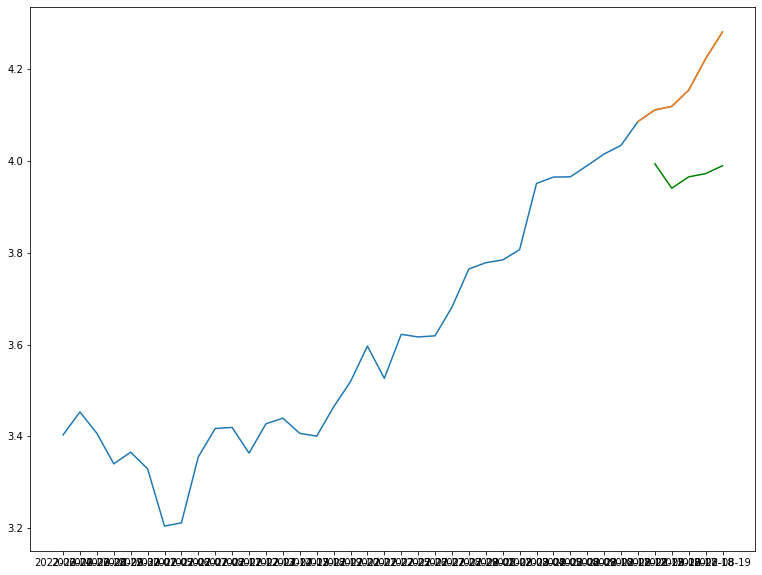

In [116]:
fig, ax = plt.subplots(1,1,figsize = (13,10))
ax.plot(A['Ratio'][-40:])
ax.plot(A.index[-6:],y_test_1['Ratio'])
ax.plot(A.index[-5:],pred[0],c='green')

In [117]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [118]:
mean_absolute_percentage_error(y_test,pred)

22.461592851148183